## Configurações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# Configurar visualizações
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('../data/input/creditcard_clean.csv')

## Pré-Processamento

In [3]:
features = df.columns[:-1]
target = df.columns[-1]

print(f'Features: {features}')
print(f'Target: {target}')

Features: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Target: Class


In [4]:
y = df['Class']
X = df.drop('Class', axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
def calculate_metrics(y_true, y_pred, y_proba, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        "Modelo": model_name,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1": report["1"]["f1-score"],
    }

## Random Forest Normal

In [7]:
rf_normal = RandomForestClassifier(random_state=42)

In [9]:
rf_normal.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
y_pred_test = rf_normal.predict(X_test)

In [11]:
y_pred_train = rf_normal.predict(X_train)

In [12]:
results_normal_test = calculate_metrics(y_test, y_pred_test, rf_normal.predict_proba(X_test)[:,1], "Normal")
results_normal_train = calculate_metrics(y_train, y_pred_train, rf_normal.predict_proba(X_train)[:,1], "Normal")

In [13]:
cm_normal = confusion_matrix(y_test, y_pred_test)

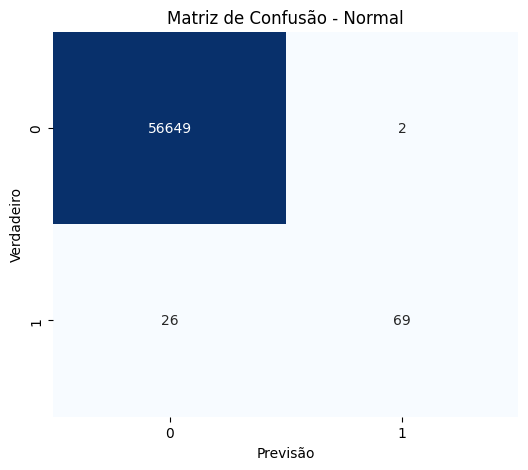

In [14]:
plt.figure(figsize=(6,5))
sns.heatmap(cm_normal, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Normal')
plt.show()

## Com Pesos Ajustados

In [15]:
rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)

In [16]:
rf_balanced.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
y_pred_test_balanced = rf_balanced.predict(X_test)

In [18]:
y_pred_train_balanced = rf_balanced.predict(X_train)

In [19]:
results_balanced_test = calculate_metrics(y_test, y_pred_test, rf_balanced.predict_proba(X_test)[:,1], "Pesos Ajustados")
results_balanced_train = calculate_metrics(y_train, y_pred_train, rf_balanced.predict_proba(X_train)[:,1], "Pesos Ajustados")

In [20]:
cm_balanced = confusion_matrix(y_test, y_pred_test_balanced)

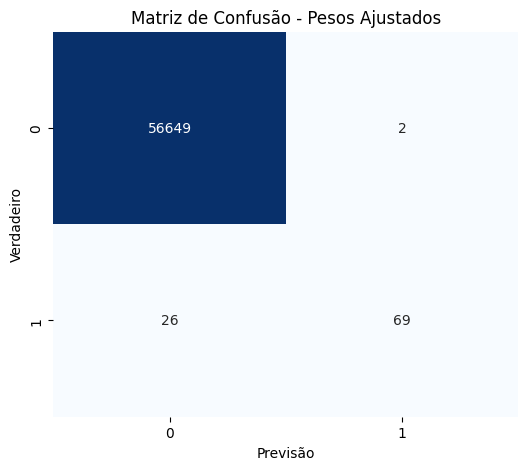

In [21]:
plt.figure(figsize=(6,5))
sns.heatmap(cm_normal, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Pesos Ajustados')
plt.show()

## Hiperparâmetros

### Número de Árvores

In [ ]:
# usar recall

In [ ]:
n_trees = [10, 25, 50, 100, 200, 500]
accuracies = []

In [ ]:
for num in n_trees:
    rf = RandomForestClassifier(n_estimators=num, class_weight='balanced', random_state=42)
    rf.fit(X_train, y_train)
    acc = rf.score(X_test, y_test)
    accuracies.append(acc)
    print(f"n_estimators={num:3d} | Acurácia: {acc:.4f}")

In [ ]:
best_idx = np.argmax(accuracies)
best_n_trees = n_trees[best_idx]
best_acc = accuracies[best_idx]

print(f"\nMelhor: n_estimators={best_n_trees}, acurácia: {best_acc:.4f}")

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(n_trees, accuracies, 'o-', linewidth=2, markersize=8, color='green')
plt.scatter([best_n_trees], [best_acc], color='red', s=100, zorder=5, label=f'Melhor: {best_n_trees}')
plt.xlabel('n_estimators')
plt.ylabel('Acurácia')
plt.title('Otimização do n_estimators', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

### Profundidade máxima

In [ ]:
max_depths = [3, 5, 7, 10, 15, 20]
accuracies = []

In [ ]:
for depth in max_depths:
    rf = RandomForestClassifier(max_depth=depth, class_weight='balanced', random_state=42)
    rf.fit(X_train, y_train)
    acc = rf.score(X_test, y_test)
    accuracies.append(acc)
    print(f"max_depth={depth} | Acurácia: {acc:.4f}")

In [ ]:
best_idx = np.argmax(accuracies[:-1])
best_max_depth = max_depths[best_idx]
best_acc = accuracies[best_idx]

In [ ]:
accuracies = accuracies[:-1]

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, accuracies, 'o-', linewidth=2, markersize=8, color='green')
plt.scatter([best_max_depth], [best_acc], color='red', s=100, zorder=5, label=f'Melhor: {best_max_depth}')
plt.xlabel('max_depth')
plt.ylabel('Acurácia')
plt.title('Otimização do max_depth', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Modelo Final

In [54]:
rf_final = RandomForestClassifier(n_estimators=50, max_depth=5, max_features=0.8, max_samples=0.9, class_weight='balanced', random_state=42)

In [55]:
rf_final.fit(X_train, y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
y_pred_test_final = rf_final.predict(X_test)

In [57]:
y_pred_train_final = rf_final.predict(X_train)

In [58]:
results_final_test = calculate_metrics(y_test, y_pred_test_final, rf_final.predict_proba(X_test)[:,1], "Final")
results_final_train = calculate_metrics(y_train, y_pred_train_final, rf_final.predict_proba(X_train)[:,1], "Final")

In [59]:
cm_final = confusion_matrix(y_test, y_pred_test_final)

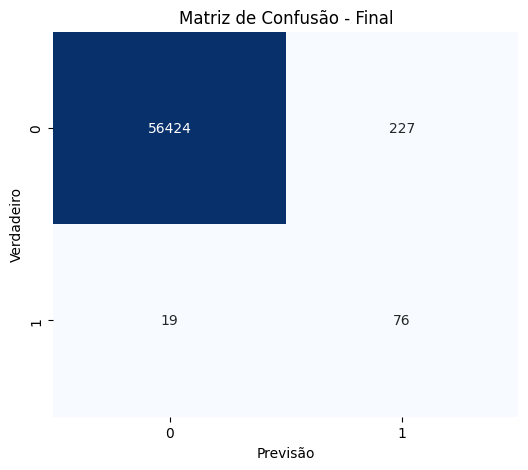

In [60]:
plt.figure(figsize=(6,5))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Final')
plt.show()

## Feature Importance

In [61]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_final.feature_importances_
}).sort_values('importance', ascending=False)

In [62]:
feature_importance

,feature,importance
14,V14,0.626119
10,V10,0.171467
4,V4,0.057679
12,V12,0.047046
8,V8,0.015956
17,V17,0.012774
3,V3,0.009338
22,V22,0.005509
20,V20,0.005384
7,V7,0.005303


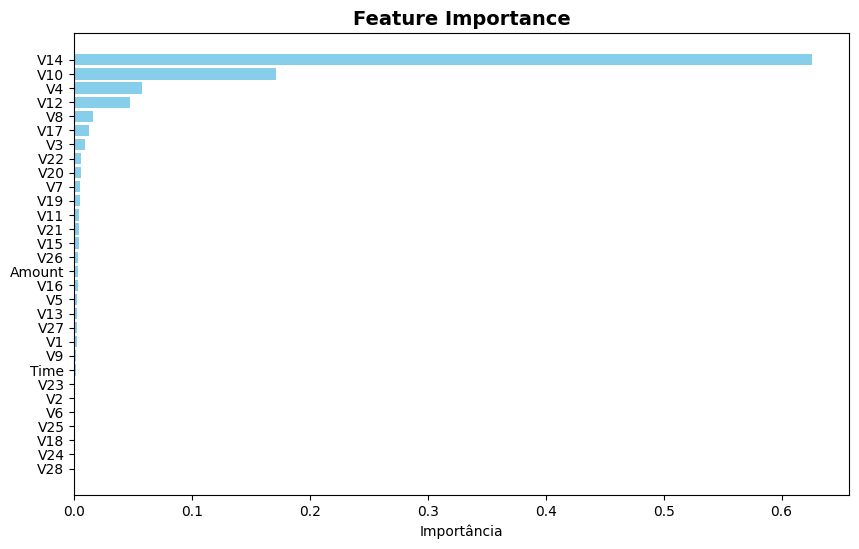

In [63]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance['importance'], color='skyblue')
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Importância')
plt.title('Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

## Comparação dos Modelos

In [64]:
df_results_test = pd.DataFrame([results_normal_test, results_balanced_test, results_final_test])

In [65]:
df_results_test

,Modelo,Precision,Recall,F1
0,Normal,0.971831,0.726316,0.831325
1,Pesos Ajustados,0.971831,0.726316,0.831325
2,Final,0.250825,0.800000,0.381910


In [66]:
df_results_train = pd.DataFrame([results_normal_train, results_balanced_train, results_final_train])

In [67]:
df_results_train

,Modelo,Precision,Recall,F1
0,Normal,1.000000,0.997354,0.998675
1,Pesos Ajustados,1.000000,0.997354,0.998675
2,Final,0.274631,0.936508,0.424715


In [ ]:
# seleção de hiperparâmetros

# grid search e random search
# optuna